In [1]:
# Common helper for all notebooks — run once per notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

os.makedirs("plots", exist_ok=True)

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")

Original: 5110 rows, 12 columns

Missing values per column:
bmi                  201
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64
After missing handling + label encoding: 5110 rows, 17 columns


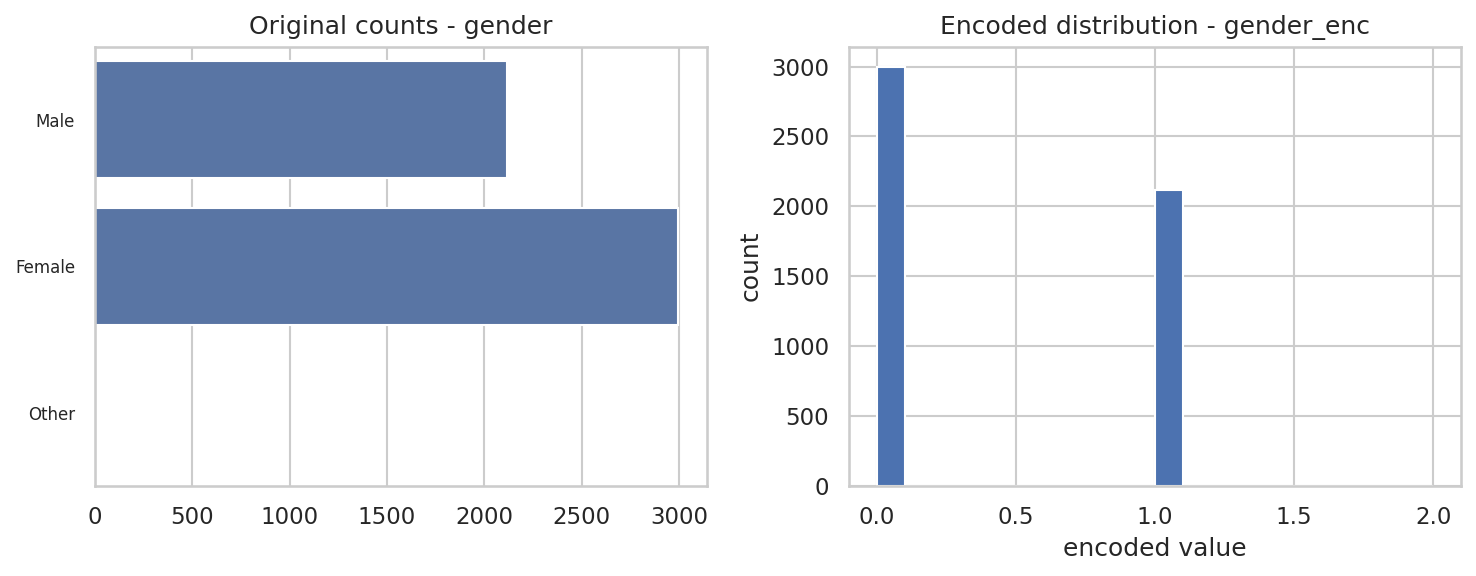

Saved: data/processed/member1_missing_labelencoded.csv


In [2]:
# Member 1 IT24101982- Ramshan M.L.M : Missing handling + label encoding
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

os.makedirs("plots", exist_ok=True)

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")


# ---------------- Load dataset ----------------
df = pd.read_csv("healthcare-dataset-stroke-data.csv")   # replace path if needed
report_shape("Original", df)

# ---------------- Missing values summary ----------------
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

# ---------------- Impute missing values ----------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Numeric → median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Categorical → "Missing"
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# ---------------- Label encoding ----------------
label_enc = LabelEncoder()
for c in cat_cols:
    df[c + "_enc"] = label_enc.fit_transform(df[c].astype(str))

report_shape("After missing handling + label encoding", df)

# ---------------- Visualization ----------------
if cat_cols:
    c = cat_cols[0]   # take first categorical column
    fig, axes = plt.subplots(1,2, figsize=(10,4))

    sns.countplot(y=df[c], ax=axes[0])
    axes[0].set_title(f"Original counts - {c}")
    axes[0].tick_params(axis='y', labelsize=8)
    axes[0].set_xlabel("")
    axes[0].set_ylabel("")

    axes[1].hist(df[c + "_enc"], bins=20)
    axes[1].set_title(f"Encoded distribution - {c}_enc")
    axes[1].set_xlabel("encoded value")
    axes[1].set_ylabel("count")

    plt.tight_layout()
    plt.savefig("plots/member1_encoding_comparison.png")
    plt.show()

# ---------------- Save processed file ----------------
os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/member1_missing_labelencoded.csv", index=False)
print("Saved: data/processed/member1_missing_labelencoded.csv")

Original: 5110 rows, 17 columns
Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
gender unique values: ['Male' 'Female' 'Other']
ever_married unique values: ['Yes' 'No']
work_type unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type unique values: ['Urban' 'Rural']
smoking_status unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
After One-Hot encoding: 5110 rows, 28 columns

Showing sample table for dummies of 'gender':


,gender_enc,gender_Female,gender_Male,gender_Other
0,1,0,1,0
1,0,1,0,0
2,1,0,1,0
3,0,1,0,0
4,0,1,0,0
5,1,0,1,0
6,1,0,1,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


Saved sample of encoded table to: plots/member2_onehot_table_sample.csv


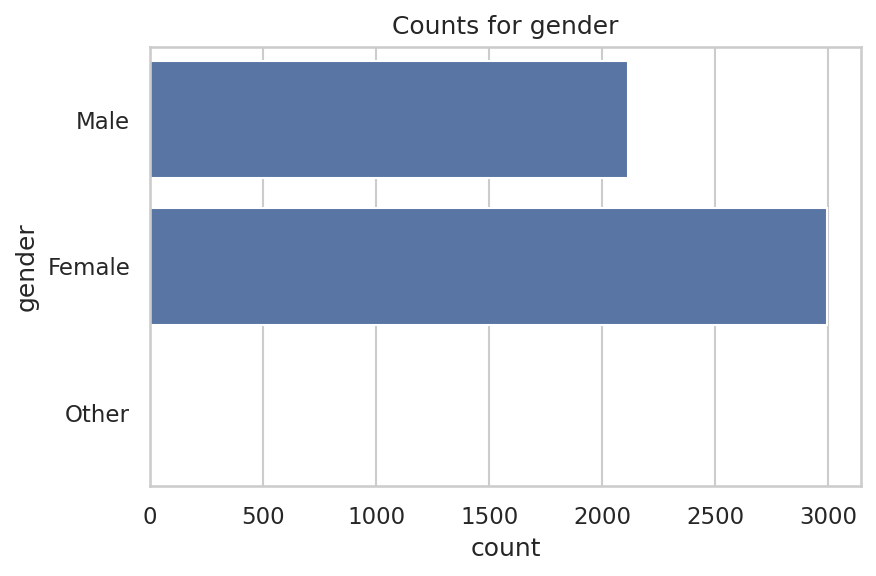

Saved encoded dataset to: data/processed/member2_onehot.csv


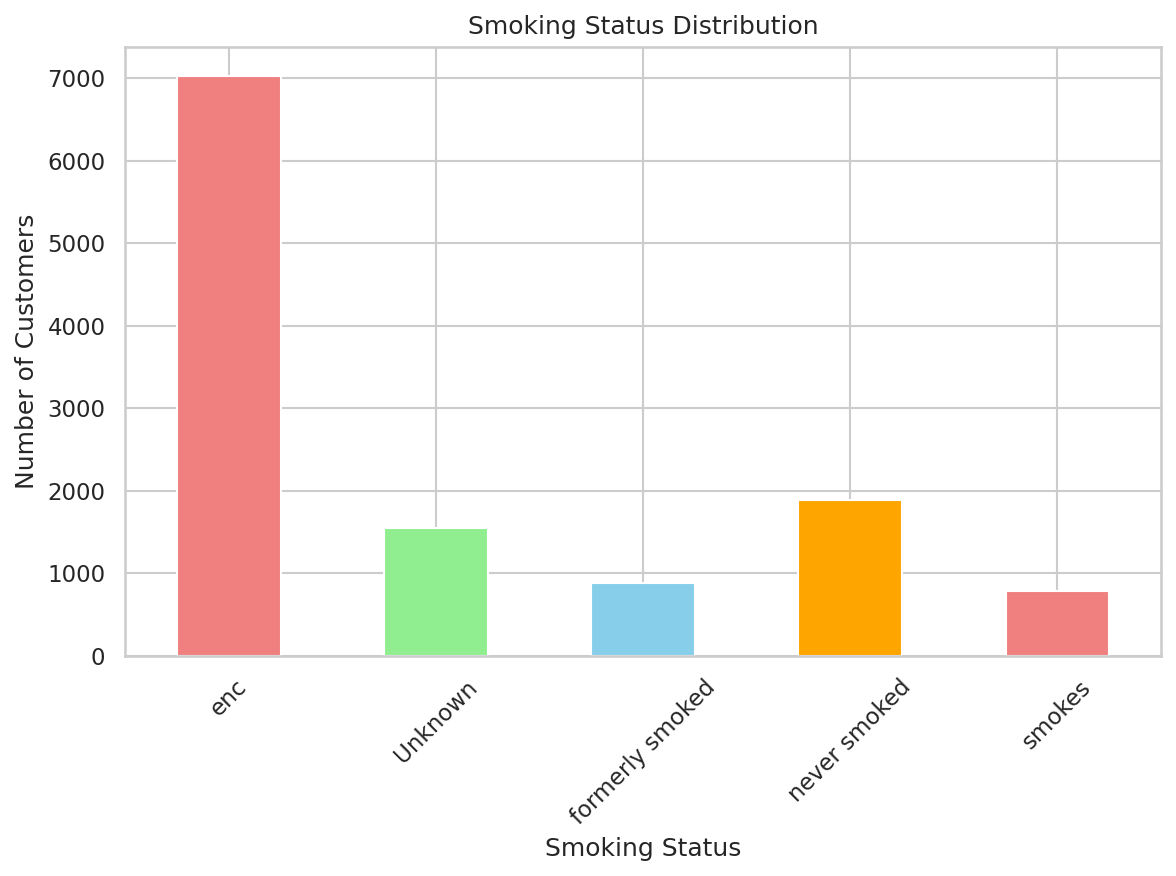

In [5]:
# Member 2 IT24101896- Abeywickrama J.B: One-Hot encoding

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style="whitegrid")

def report_shape(stage, df):
    print(f"{stage}: {df.shape[0]} rows, {df.shape[1]} columns")

os.makedirs("plots", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

df = pd.read_csv("data/processed/member1_missing_labelencoded.csv")
report_shape("Original", df)

cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical columns:", cat_cols)

df[cat_cols] = df[cat_cols].fillna("Missing")

for col in cat_cols:
    print(f"{col} unique values:", df[col].unique())

#One hot encoding
df_ohe = pd.get_dummies(df, columns=cat_cols, drop_first=False).astype(int)
report_shape("After One-Hot encoding", df_ohe)

if cat_cols:
    first_cat = cat_cols[0]
    dummy_cols = [c for c in df_ohe.columns if c.startswith(first_cat + "_")]
    if len(dummy_cols) == 0:
        print("No dummy columns found for", first_cat)
    else:
        print(f"\nShowing sample table for dummies of '{first_cat}':")
        display(df_ohe[dummy_cols].head(10))
        df_ohe[dummy_cols].head(200).to_csv("plots/member2_onehot_table_sample.csv", index=False)
        print("Saved sample of encoded table to: plots/member2_onehot_table_sample.csv")

#EDA
if cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[first_cat].astype(str))
    plt.title(f"Counts for {first_cat}")
    plt.tight_layout()
    plt.savefig("plots/member2_counts_first_cat.png", bbox_inches='tight')
    plt.show()

csv_path = "data/processed/member2_onehot.csv"
df_ohe.to_csv(csv_path, index=False)
print(f"Saved encoded dataset to: {csv_path}")

smoking_status_cols = [col for col in df_ohe.columns if col.startswith('smoking_status_')]

smoking_status_counts = {}
for col in smoking_status_cols:
    smoking_status_counts[col.replace('smoking_status_', '')] = df_ohe[col].sum()

smoking_status_counts = pd.Series(smoking_status_counts)
plt.figure(figsize=(8, 6))
smoking_status_counts.plot(kind='bar', color=['lightcoral', 'lightgreen', 'skyblue', 'orange'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

save_path = 'plots/member2_smoking_status_distribution.png'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
plt.close()

Original: 5110 rows, 28 columns
Continuous numeric columns: ['age', 'avg_glucose_level', 'bmi']


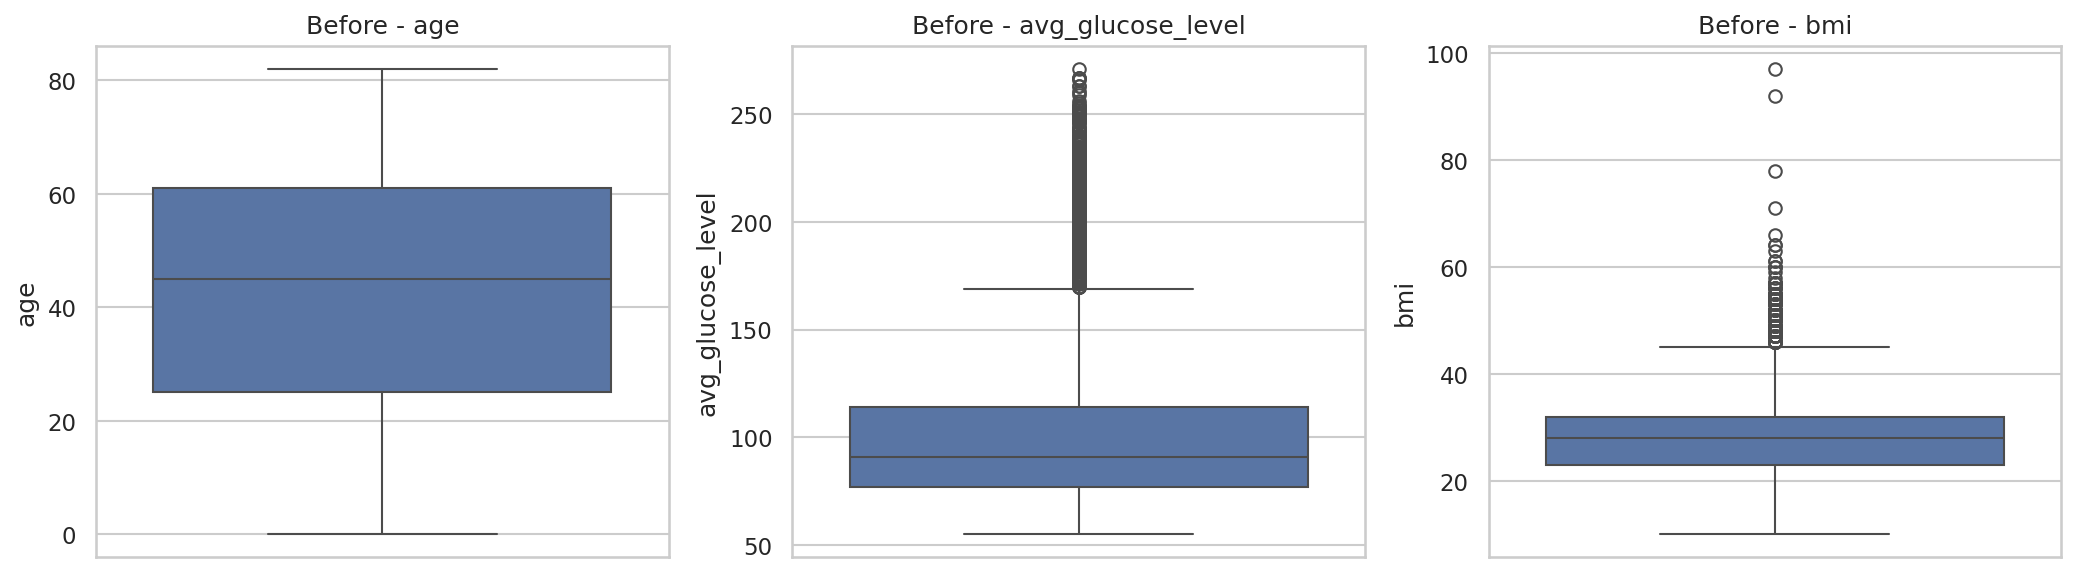

Rows removed by IQR method: 719
After outlier removal: 4391 rows, 28 columns


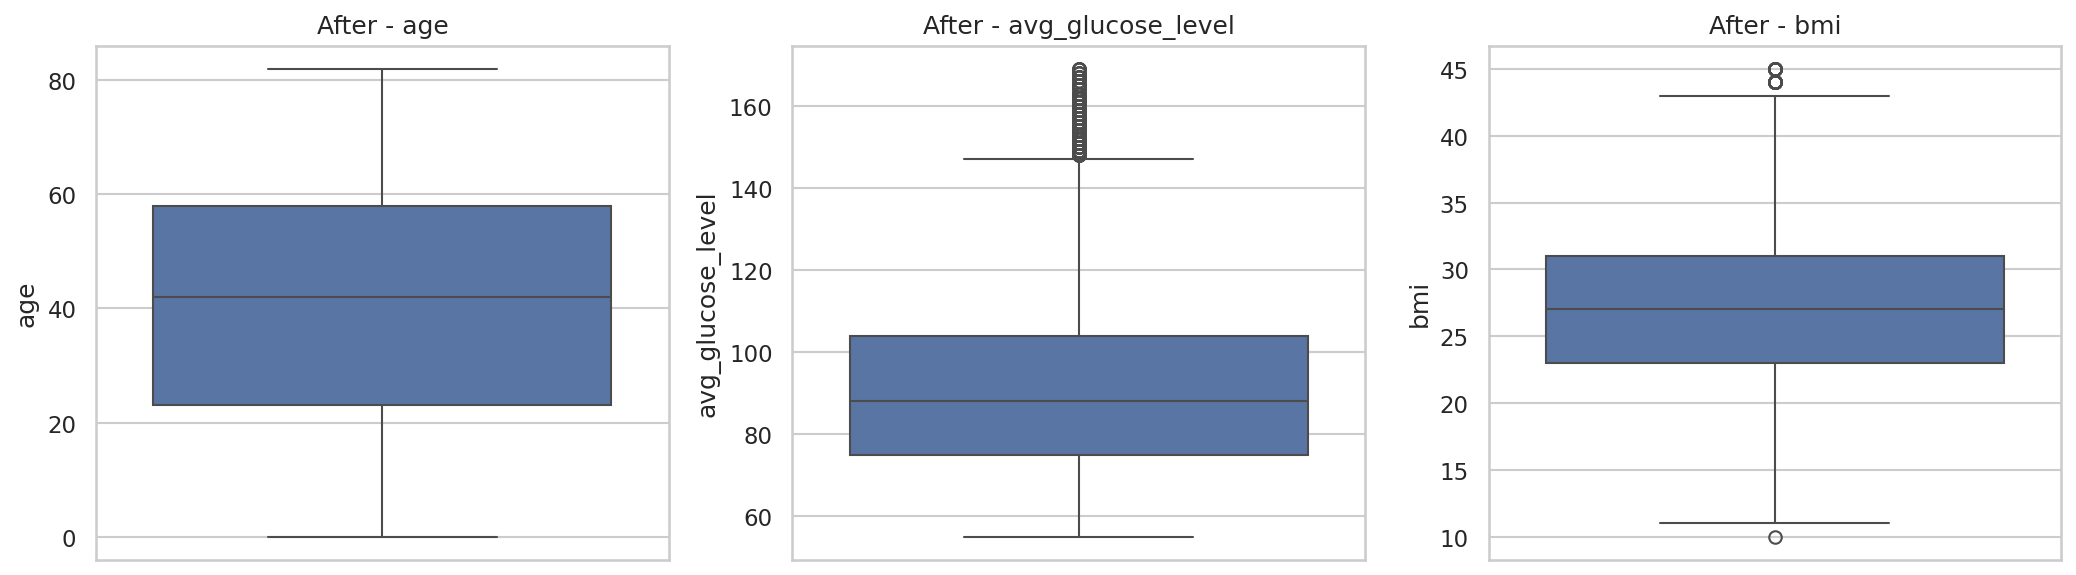

Saved: data/processed/member3_outliers_removed.csv


In [6]:
# Member 3 IT24200536-Karunarathna B.G.C.N.S: Outlier detection & IQR removal

df = pd.read_csv("data/processed/member2_onehot.csv")
report_shape("Original", df)

cont_cols = ['age', 'avg_glucose_level', 'bmi']
print("Continuous numeric columns:", cont_cols)

# Boxplots before
fig, axes = plt.subplots(1, len(cont_cols), figsize=(14,4))
for i,c in enumerate(cont_cols):
    sns.boxplot(y=df[c], ax=axes[i])
    axes[i].set_title(f"Before - {c}")
plt.tight_layout()
plt.savefig("plots/member3_boxplots_before.png")
plt.show()

#IQR outlier removal
def remove_outliers_iqr(df_, cols, k=1.5):
    df_clean = df_.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - k*IQR, Q3 + k*IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_clean = remove_outliers_iqr(df, cont_cols, k=1.5)
print(f"Rows removed by IQR method: {df.shape[0] - df_clean.shape[0]}")

report_shape("After outlier removal", df_clean)

# Boxplots after
fig, axes = plt.subplots(1, len(cont_cols), figsize=(14,4))
for i,c in enumerate(cont_cols):
    sns.boxplot(y=df_clean[c], ax=axes[i])
    axes[i].set_title(f"After - {c}")
plt.tight_layout()
plt.savefig("plots/member3_boxplots_after.png")
plt.show()

os.makedirs("data/processed", exist_ok=True)
df_clean.to_csv("data/processed/member3_outliers_removed.csv", index=False)
print("Saved: data/processed/member3_outliers_removed.csv")